<a href="https://colab.research.google.com/github/nitish-raj/Price-Predictions-ML/blob/master/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Description: This program uses an artificial recurrent neural network called Long short term memory (LSTM) to
#               predict the closing stock price of corporation (Apple Inc.) using the past 60 day stock price.


# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [76]:
# Get the stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2021-05-15")

# Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.849998
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997


In [77]:
# get nuber of rows and column
df.shape

(2357, 6)

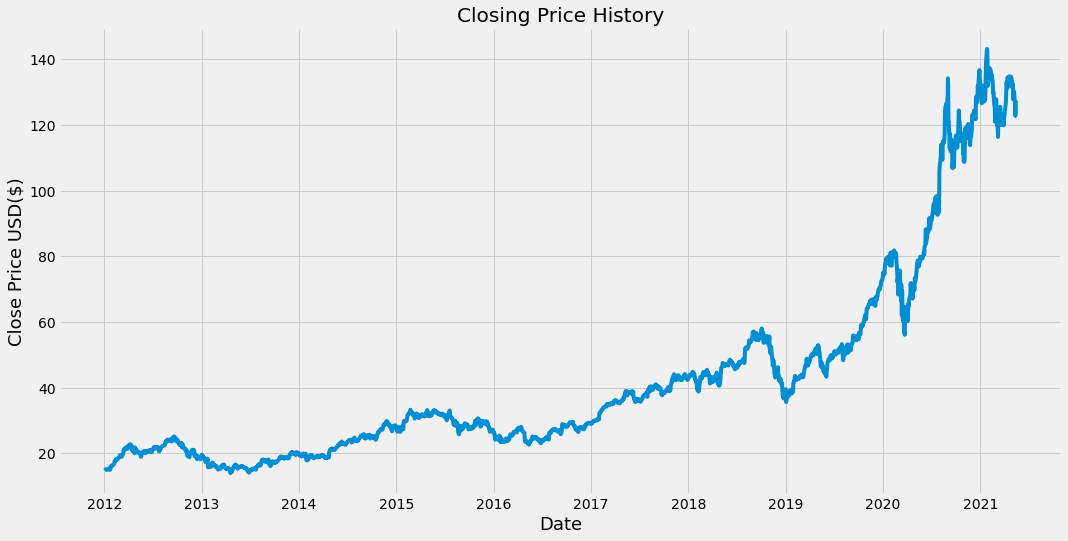

In [78]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()

In [79]:
data = df.filter(["Close"])

# Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1886

In [80]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.84219788],
       [0.85922413],
       [0.87841729]])

In [81]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]
[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.008

In [82]:
# Convert x_train and y_triain to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [83]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1826, 60, 1)

In [98]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [99]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [100]:
# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=30)

Epoch 1/30
115/115 [==============================] - 8s 45ms/step - loss: 0.0034
Epoch 2/30
115/115 [==============================] - 5s 48ms/step - loss: 1.0588e-04
Epoch 3/30
115/115 [==============================] - 5s 47ms/step - loss: 1.1111e-04
Epoch 4/30
115/115 [==============================] - 5s 47ms/step - loss: 8.1070e-05
Epoch 5/30
115/115 [==============================] - 5s 46ms/step - loss: 7.4896e-05
Epoch 6/30
115/115 [==============================] - 5s 46ms/step - loss: 6.7693e-05
Epoch 7/30
115/115 [==============================] - 5s 46ms/step - loss: 5.4630e-05
Epoch 8/30
115/115 [==============================] - 5s 46ms/step - loss: 7.9597e-05
Epoch 9/30
115/115 [==============================] - 5s 46ms/step - loss: 7.2574e-05
Epoch 10/30
115/115 [==============================] - 5s 46ms/step - loss: 7.0363e-05
Epoch 11/30
115/115 [==============================] - 6s 48ms/step - loss: 5.2088e-05
Epoch 12/30
115/115 [==============================] - 5

In [101]:
# Create the testing dataset
# Create a new array containing scaled vaues from index 1543 to 2003

test_data = scaled_data[training_data_len - 60 :, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

In [102]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [103]:
# Get the model's predicted price value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [104]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.6416268318322054

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


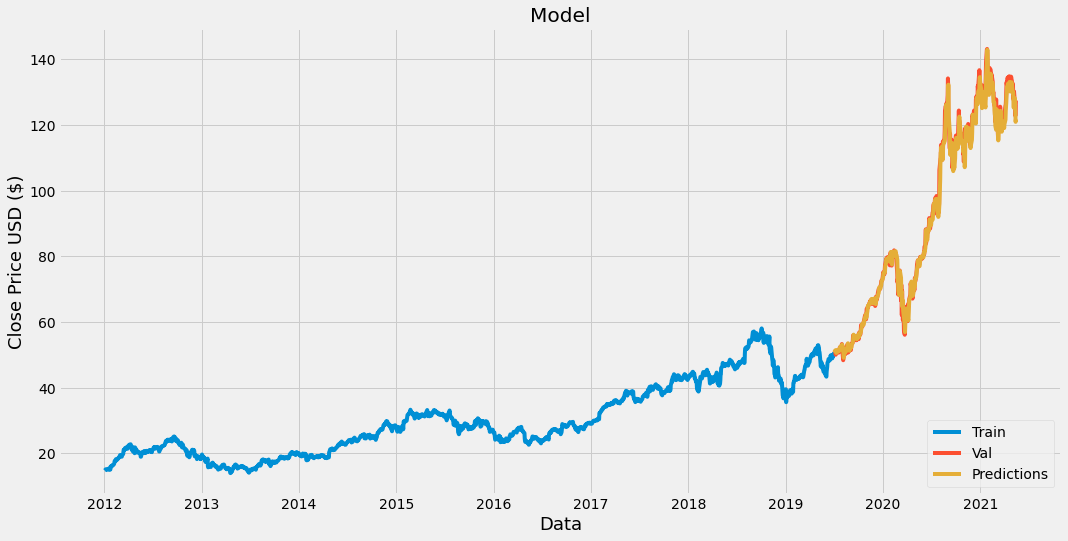

In [105]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["predictions"] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [106]:
valid["err"] = (
    (valid["Close"].astype(float) - valid["predictions"].astype(float))
    / valid["Close"].astype(float)
    * 100
).round(3)
valid.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,predictions,err
count,471.000000,471.000000,471.000000
mean,92.057818,91.416199,0.462514
std,29.193923,28.440235,2.499771
min,48.334999,49.057682,-11.179000
25%,66.056252,66.190090,-0.788000
50%,83.974998,83.420715,0.437000
75%,120.974998,119.459278,1.805500
max,143.160004,142.910172,9.823000
